<a href="https://colab.research.google.com/github/jupena01/ML-Project/blob/main/HW_1_JulianPena_661979108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Question 1
import math
x1 = [2,3,4,8,9]
print('x1 contains 5 features!')
L1_x1 = 2 + 3 + 4 + 8 + 9
L2_x1 = math.sqrt(4 + 9 + 16 + 64 + 81)
Linf_x1 = 9
print('Manhattan norm of x1:', L1_x1)
print('Euclidean norm of x1:', L2_x1)
print('Max-norm of x1:', Linf_x1)

x2 = [2,-3,-4,89]
print('x2 contains 4 features!')
L1_x2 = 2 + 3 + 4 + 89
L2_x2= math.sqrt(4 + 9 + 16 + 7921)
Linf_x2 = 89
print('Manhattan norm of x2:', L1_x2)
print('Euclidean norm of x2:', L2_x2)
print('Max-norm of x2:', Linf_x2)

x1 contains 5 features!
Manhattan norm of x1: 26
Euclidean norm of x1: 13.19090595827292
Max-norm of x1: 9
x2 contains 4 features!
Manhattan norm of x2: 98
Euclidean norm of x2: 89.16277250063504
Max-norm of x2: 89


In [ ]:
#Question 2
#input 1024x1024, output 64x64 -> both have 3 color channels (RGB)
Lx = 1024 * 1024 * 3
print('Length of x:', Lx)
Ly = 64 * 64 * 3
print('Length of y:',Ly)
#y = Wx + b
W = Lx * Ly
print('Elements in matrix W:', W)
b = Ly
print('Elements in vector b:', b)

Length of x: 3145728
Length of y: 12288
Elements in matrix W: 38654705664
Elements in vector b: 12288


In [ ]:
#Question 3
import numpy as np
from numpy.linalg import eig
W = np.array([[1,-1],[2,0]])

#1-norm
j1 = 1 + 2
j2 = 1 + 0
print('1-norm:', 3)

#2-norm
Wt = np.array([[1,2],[-1,0]]) #W transposed
A = np.array([[5,-1],[-1,1]]) #Wt*W
w,v = eig(A)
print('E-value:',w)
print('E-vector:',v)
rho = math.sqrt(5.23606798)
print('2-norm:', rho)

#inf-norm
i1 = 1 + 1
i2 = 2 + 0
print('inf-norm:', 2)

#Frobenius-norm
F = np.array([[1,1],[4,0]]) #W^2
sum = 1+1+4+0
f = math.sqrt(sum)
print('Frobenius-norm:',f)

1-norm: 3
E-value: [5.23606798 0.76393202]
E-vector: [[ 0.97324899  0.22975292]
 [-0.22975292  0.97324899]]
2-norm: 2.288245611817053
inf-norm: 2
Frobenius-norm: 2.449489742783178


In [ ]:
#Question 4
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
iris.data
iris.feature_names
iris.target_names
iris.target
X = iris.data[:, :3]
y = iris.target
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)
clf = svm.SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(preds)
print('actual iris species')
print(y_test)
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

[1 1 1 1 0 2 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 2 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 2 0 0 1 1 2 1 2 1 1 2 1 1]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
accuracy score : 0.9333333333333333


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 6)                 12        
                                                                 
 dense_17 (Dense)            (None, 6)                 42        
                                                                 
 dense_18 (Dense)            (None, 6)                 42        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step
[1.0] => 1.06 (expected 1.00)
[2.0] => 1.10 (expected 1.10)
[3.0] => 1.15 (expected 1.17)
[4.0] =

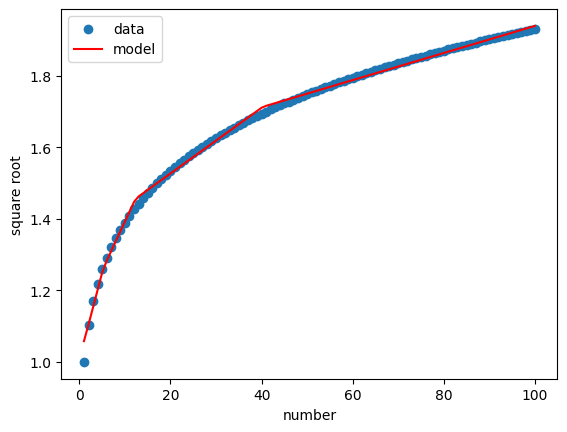

In [ ]:
#Question 5
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np
import matplotlib.pyplot as plt

#Load dataset
#split into input (X) and output (y)
X = np.array([[i] for i in range(1, 101)]).astype(float)
y = np.array([[i**(1/7)] for i in range(1, 101)]).astype(float)

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

for i in range(100):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]))

number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('square root')
plt.legend()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 8)                 16        
                                                                 
 dense_33 (Dense)            (None, 8)                 72        
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [==============================] - 0s 2ms/step
0.22222222222222213 => 0.16 (expected 0.07)
0.1666666666666668 => 0.13 (expected 0.07)
0.11111111111111119 => 0.10 (expected 0.05)
0.08333333333333327 => 0.08 (expected 0.08)
0.19444444444444448 => 0.14 (expected 0.07)
0.3055555555

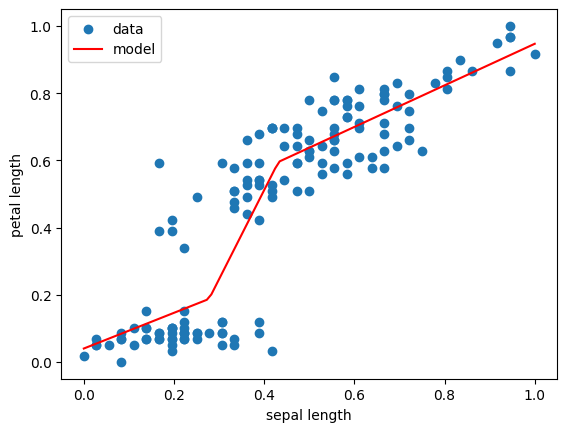

In [ ]:
#Question 6
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris.data
iris.feature_names
iris.target_names
iris.target
X = iris.data[:, 0]  # Sepal length
y = iris.data[:, 2]  # Petal length

# Normalize the data
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())

# Define the Keras model
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

for i in range(100):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]))

number_grid = np.linspace(0, 1, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()